<a href="https://colab.research.google.com/github/mountain0212/cat_vedio_kares/blob/master/cat_sound_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
soundlist = os.listdir('/content/drive/My Drive/all_data_used')
soundlist

['CuteStrayCat_130.wav',
 'none',
 'caveat',
 'cat_talk_cats',
 'cat_call_persion',
 'purring',
 'x_train_o.npy',
 'y_train_o.npy',
 'x_test_o.npy',
 'y_test_o.npy',
 'used_none_data.npy',
 'to_niose_data.npy']

In [ ]:
pip install pydub librosa

In [ ]:
from keras import backend as K
import gc


K.clear_session()
gc.collect()

Using TensorFlow backend.


0

# 聲音檔轉munpy &存成npy檔

In [ ]:
# from pydub import AudioSegment
# import os
# import numpy as np
# import scipy.io.wavfile as wav
# import random
# import librosa
# import gc
# x_train_o=[]
# y_train_o=[]
# x_test_o=[]
# y_test_o=[]
# path = "/content/drive/My Drive/all_data_used"
# list_sigle =['none', 'purring', 'cat_talk_cats', 'cat_call_persion', 'caveat']
# used_none_data=np.load(f'{path}/used_none_data.npy')

# all_data_folder_name = [f"{item}" for item in os.listdir(path) if "." not in item ]
# for folder_name in all_data_folder_name:
#   file_name = os.listdir(f"{path}/{folder_name}")
#   data_temp = [f"{path}/{folder_name}/{item}" for item in file_name]
#   all_data_name =random.sample(data_temp, 400)
#   if folder_name =="none":
#     used_none_data = all_data_name
#   count = 0
#   for item in all_data_name: 
#     wave, sr = librosa.load(item, mono=True, sr=None)
#     zero_np = np.zeros(5)
#     zero_np[list_sigle.index(folder_name)]=1

#     if count % 20==0:
#         x_test_o.append([wave])
#         y_test_o.append(zero_np)
#     else:
#         x_train_o.append([wave])
#         y_train_o.append(zero_np)
#     count +=1
# x_train_o = np.array(x_train_o)
# y_train_o = np.array(y_train_o)
# x_test_o = np.array(x_test_o)
# y_test_o = np.array(y_test_o)

# np.save(f'{path}/x_train_o.npy',x_train_o)
# np.save(f'{path}/y_train_o.npy',y_train_o)
# np.save(f'{path}/x_test_o.npy',x_test_o)
# np.save(f'{path}/y_test_o.npy',y_test_o)



雜音存成numpy檔

In [ ]:
# from pydub import AudioSegment
# import os
# import numpy as np
# import scipy.io.wavfile as wav
# import random
# import librosa
# import gc
# to_niose_data =[]
# file_name = os.listdir(f"{path}/none")
# data_temp = [f"{path}/none/{item}" for item in os.listdir(f"{path}/none") if item not in used_none_data ]
# for item in data_temp:
#   wave, sr = librosa.load(item, mono=True, sr=None)
#   to_niose_data.append([wave])
# to_niose_data = np.array(to_niose_data)
# np.save(f'{path}/to_niose_data.npy',to_niose_data)

# 讀取npy檔

In [ ]:
from pydub import AudioSegment
import os
import numpy as np
import scipy.io.wavfile as wav
import random
import librosa
import gc
used_none_data = []
path = "/content/drive/My Drive/all_data_used"
x_train_o=np.load(f'{path}/x_train_o.npy',allow_pickle=1)
y_train_o=np.load(f'{path}/y_train_o.npy')
x_test_o=np.load(f'{path}/x_test_o.npy',allow_pickle=1)
y_test_o=np.load(f'{path}/y_test_o.npy')
used_none_data=np.load(f'{path}/used_none_data.npy')
to_niose_data =[x for x in np.load(f'{path}/to_niose_data.npy',allow_pickle=1)]
MFCC_NUM = 20 
SAMPLING_RATE=22050

def wav2mfcc(wave, max_len=512):
#     mfcc = librosa.feature.mfcc(wave, sr=16000)
    wave_mean = abs(np.mean(wave))
    
    if wave_mean != 0:
      wave = wave / wave_mean
    mfcc = librosa.feature.mfcc(wave, n_mfcc=MFCC_NUM, sr=SAMPLING_RATE)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc


def add_noise(data):
    wn = np.random.normal(0,1,len(data))
    data_noise = np.where(data != 0.0, data.astype('float64') + 0.02 * wn, 0.0)
    return data_noise

def add_noise_other(data, add_path):
#     wn = np.random.normal(0,1,len(data))
    wave, sr = librosa.load(add_path, mono=True, sr=None)
    # wave = librosa.resample(wave, sr, 8000)
    to_num = int(abs(len(data) - len(wave)))
    to_long = np.zeros(to_num).astype('float64')
    if  len(data) > len(wave):
        wave =  np.append(wave,to_long)
    elif len(data) < len(wave):
        data =  np.append(data,to_long)
        
    data_noise = data.astype('float64') + wave
#     data_noise = np.where(data1 != 0.0, data1.astype('float64') + 0.02 * data2, 0.0)
    return data_noise

def add_noise_other_np(data, add_data):
  
    to_num = int(abs(len(data) - len(add_data)))
    to_long = np.zeros(to_num).astype('float64')
    if  len(data) > len(add_data):
        add_data =  np.append(add_data,to_long)
    elif len(data) < len(add_data):
        data =  np.append(data,to_long)
        
    data_noise = data.astype('float64') + (add_data *0.5)

    return data_noise

#  依照檔案路徑存將雜音加入系統中
def GetFataFromPath(data_x,data_y ,add_size=10):
    x = []
    y = []
    global used_none_data
    data_temp = [f"{path}/none/{item}" for item in os.listdir(f"{path}/none") if item not in used_none_data ]
    # data_temp = data_temp[~data_temp==used_none_data]
    data_temp = random.sample(data_temp, add_size)
    for i in range(len(data_x)):
      if i %200 == 0:
        print( i)
      for add_wave in data_temp:
        x_temp = wav2mfcc(add_noise_other(data_x[i][0],add_wave ))
        x.append(x_temp )
        y.append(data_y[i] )
    x = np.array(x)
    x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
    y = np.array(y)

    return x,y

# 依照讀取的檔案加入對應的雜訊
def GetFataFromNp(data_x,data_y ,add_size=10):
    x = []
    y = []
    global used_none_data, to_niose_data
    # data_temp = [f"{path}/none/{item}" for item in os.listdir(f"{path}/none") if item not in used_none_data ]
    # data_temp = data_temp[~data_temp==used_none_data]
    # data_temp = random.sample(list(to_niose_data), add_size)
    data_temp = random.sample(list(to_niose_data), add_size)
    for i in range(len(data_x)):
      if i %200 == 0:
        print( f"now in {i} / {len(data_x)}====>there are {len(y)} data")
        # data_temp = random.sample(list(to_niose_data), add_size)
      x_temp = wav2mfcc(data_x[i][0] )
      x.append(x_temp )
      y.append(data_y[i] )
      # x_temp = wav2mfcc(add_noise(data_x[i][0]))
      # x.append(x_temp )
      # y.append(data_y[i] )
      # data_temp = random.sample(list(to_niose_data), add_size)
      for add_wave in data_temp:
        x_temp = wav2mfcc(add_noise_other_np(data_x[i][0],add_wave[0] ))
        x.append(x_temp )
        y.append(data_y[i] )
    x = np.array(x)
    x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
    y = np.array(y)

    return x,y

In [ ]:
print(len(x_train_o),len(y_train_o),len(x_test_o),len(y_test_o))

1900 1900 100 100


In [ ]:
x_train,y_train =  GetFataFromNp(x_train_o,y_train_o ,add_size=4)
print("==================================")
x_test,y_test =  GetFataFromNp(x_test_o,y_test_o ,add_size=10)

now in 0 / 1900====>there are 0 data
now in 200 / 1900====>there are 1000 data
now in 400 / 1900====>there are 2000 data
now in 600 / 1900====>there are 3000 data
now in 800 / 1900====>there are 4000 data
now in 1000 / 1900====>there are 5000 data
now in 1200 / 1900====>there are 6000 data
now in 1400 / 1900====>there are 7000 data
now in 1600 / 1900====>there are 8000 data
now in 1800 / 1900====>there are 9000 data
now in 0 / 100====>there are 0 data


# 前處理檢查 & 儲存成文件


In [ ]:
def show_data(a):
  print(type(a) )
  print(a.shape )
  print(a.dtype )
show_data(x_train)
show_data(x_test)
show_data( y_train)
show_data( y_test)
# print(y_test)
# example.save('example.npy')
# np.save(f'{path}/x_train.npy',x_train)
# np.save(f'{path}/y_train.npy',y_train)
# np.save(f'{path}/x_test.npy',x_test)
# np.save(f'{path}/y_test.npy',y_test)



<class 'numpy.ndarray'>
(9500, 20, 512, 1)
float64
<class 'numpy.ndarray'>
(1100, 20, 512, 1)
float64
<class 'numpy.ndarray'>
(9500, 5)
float64
<class 'numpy.ndarray'>
(1100, 5)
float64


# 讀取聲音文字檔

In [ ]:

# import os
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle

# path = "/content/drive/My Drive/all_data_used"
# SAMPLING_RATE = 22050
# MFCC_NUM = 20
# MFCC_MAX_LEN = 1024

# def show_data(a):
#   print(type(a) )
#   print(a.shape )
#   print(a.dtype )


# x_train=np.load(f'{path}/x_train.npy')
# y_train=np.load(f'{path}/y_train.npy')
# x_test=np.load(f'{path}/x_test.npy')
# y_test=np.load(f'{path}/y_test.npy')
# show_data(x_train)
# show_data(x_test)
# show_data( y_train)
# show_data( y_test)



# 資料分割


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train,y_train = shuffle(x_train,y_train) # 打亂測試數據的資料
x_test1,y_test1,x_test2,y_test2=train_test_split(x_test,y_test,test_size=0.5)

def show_data(a):
  print(type(a) )
  print(a.shape )
  print(a.dtype )


show_data(x_test1)
show_data(y_test1)
show_data(x_test2)
show_data(y_test2)

<class 'numpy.ndarray'>
(550, 20, 512, 1)
float64
<class 'numpy.ndarray'>
(550, 20, 512, 1)
float64
<class 'numpy.ndarray'>
(550, 5)
float64
<class 'numpy.ndarray'>
(550, 5)
float64


# 建立模組

In [ ]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

84

In [ ]:
import keras
from keras.models import Sequential
import keras.layers as ly
from keras.utils import to_categorical,plot_model
from keras import optimizers
# from keras.layers import LeakyReLU


# model.add(Conv2D(..., activation=lrelu, ...)

# input_shape=(feature_dim_1, feature_dim_2, channel)
def get_model(num_classes, input_shape):
    model = Sequential()
    model.add(ly.Conv2D(32, kernel_size=(3, 3),  input_shape=input_shape))
    model.add(ly.LeakyReLU(alpha=0.1))
    model.add(ly.Conv2D(64, kernel_size=(3, 3)))
    model.add(ly.LeakyReLU(alpha=0.1))
    # model.add(ly.Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(ly.Flatten())
    model.add(ly.Dropout(0.25))## new add
    model.add(ly.Dense(64, activation='relu'))
    model.add(ly.Dropout(0.4))
    model.add(ly.Dense(num_classes, activation='softmax'))
    return model

# def get_model(num_classes, input_shape):
#     model = Sequential()
#     model.add(ly.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#     model.add(ly.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(ly.MaxPooling2D(pool_size=(2, 2)))
#     model.add(ly.Dropout(0.25))
#     model.add(ly.Flatten())
#     model.add(ly.Dense(512, activation='relu')) ## new add
#     model.add(ly.Dropout(0.25))relu## new add
#     model.add(LSTM(128))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(ly.Dense(64, activation='relu'))
#     model.add(ly.Dropout(0.4))
#     model.add(ly.Dense(num_classes, activation='softmax'))
#     return model

def get_model_LSTM(num_classes, input_shape):
    model = Sequential()
    # model.add(ly.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(ly.TimeDistributed(ly.LSTM(128),input_shape=input_shape))
    print(model.output_shape)
    model.add(ly.Dropout(0.25))
    model.add(ly.Flatten())
    model.add(ly.Dense(128, activation='relu')) ## new add
    model.add(ly.Dense(32, activation='relu'))
    model.add(ly.Dropout(0.4))
    model.add(ly.Dense(num_classes, activation='softmax'))
    return model

2020-06-27 01:50:29
(20, 512, 1)


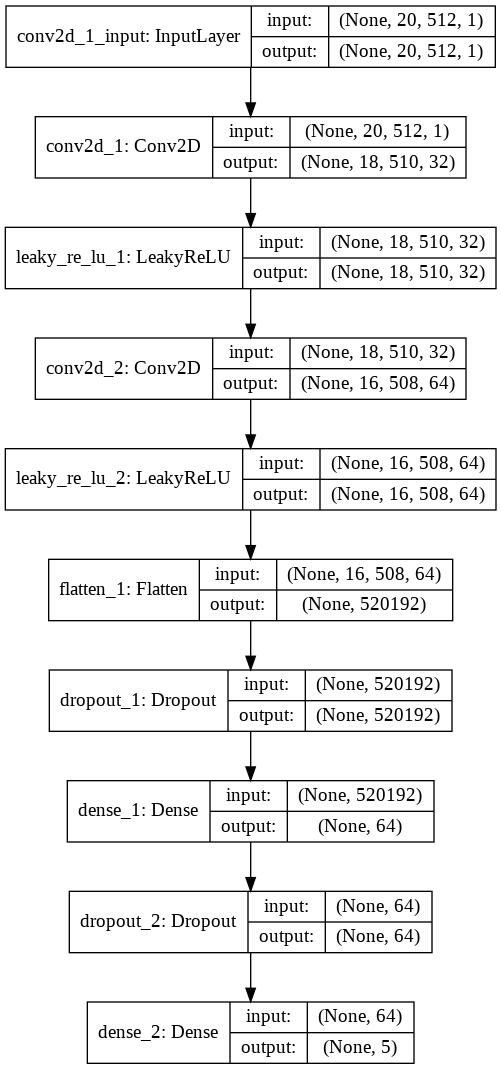

In [ ]:
import time
 
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

channel = 1
epochs = 30
batch_size = 128
verbose = 1

num_classes = y_train.shape[1]
input_shape = x_train[0].shape
# input_shape = x_test.shape
print(input_shape)
# input_shape = (30,MFCC_MAX_LEN,1 )
model = get_model(num_classes, input_shape)
# model = get_model_LSTM(num_classes, input_shape)
plot_model(model, to_file='/content/drive/My Drive/mode.png',show_shapes = True)



In [ ]:
# optimizer = optimizers.SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
# loss_op = keras.losses.categorical_crossentropy
# optimizer=  keras.optimizers.Adam(learning_rate=0.0005)
optimizer=  keras.optimizers.Adamax(learning_rate=0.0005)
# loss_op = keras.losses.binary_crossentropy
loss_op = keras.losses.hinge
model.compile(loss=loss_op,
              optimizer=optimizer,
              metrics=['accuracy'])

# 開始計算

In [ ]:
history= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=verbose, validation_data=(x_test1, x_test2))
# history= model.fit(x_train, y_train, batch_size=batch_size, epochs=20,verbose=verbose, validation_data=(x_test1, x_test2))

Train on 9500 samples, validate on 550 samples
Epoch 1/30
9500/9500 [==============================] - 5s 520us/step - loss: 1.1162 - accuracy: 0.2098 - val_loss: 1.0864 - val_accuracy: 0.2873
Epoch 2/30
9500/9500 [==============================] - 5s 495us/step - loss: 1.0889 - accuracy: 0.2780 - val_loss: 1.0596 - val_accuracy: 0.3509
Epoch 3/30
9500/9500 [==============================] - 5s 498us/step - loss: 1.0799 - accuracy: 0.3003 - val_loss: 1.0586 - val_accuracy: 0.3545
Epoch 4/30
9500/9500 [==============================] - 5s 497us/step - loss: 1.0625 - accuracy: 0.3438 - val_loss: 1.0561 - val_accuracy: 0.3600
Epoch 5/30
9500/9500 [==============================] - 5s 496us/step - loss: 1.0471 - accuracy: 0.3825 - val_loss: 1.0300 - val_accuracy: 0.4255
Epoch 6/30
9500/9500 [==============================] - 5s 498us/step - loss: 1.0258 - accuracy: 0.4351 - val_loss: 1.0321 - val_accuracy: 0.4200
Epoch 7/30
9500/9500 [==============================] - 5s 495us/step - loss:

# 儲存model

In [ ]:
from keras.models import load_model

model.save('/content/drive/My Drive/model20200627_leakyRelu_1.h5')  # creates a HDF5 file 'model.h5'

# 練習結果驗證


2020-06-27 01:57:14


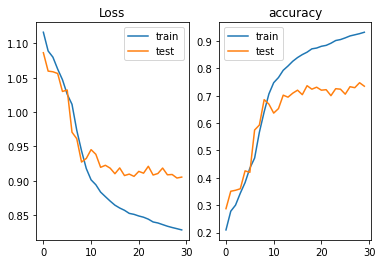

<Figure size 2160x4320 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import time
 
# 格式化成2016-03-20 11:45:39形式

print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
# plot mse during training
plt.subplot(122)
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.legend()
plt.figure(figsize=(30,60))
plt.show()

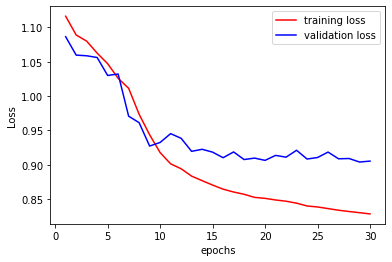

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'b',label="training loss",c="red")
plt.plot(epochs,val_loss,'b',label="validation loss")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


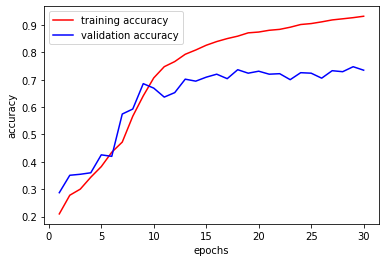

In [ ]:
import matplotlib.pyplot as plt
categorical_accuracy = history.history['accuracy']
val_categorical_accuracy = history.history['val_accuracy']
epochs=range(1,len(categorical_accuracy)+1)
plt.plot(epochs, categorical_accuracy,'b',label="training accuracy",c="red")
plt.plot(epochs, val_categorical_accuracy,'b',label="validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 資料測試驗證

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, batch_size=y_test.shape[0], 
            verbose=False)

loss, accuracy = model.evaluate(x_test, y_test, batch_size=y_test.shape[0], 
            verbose=False)

# loss, accuracy = model.evaluate(y_test1, y_test2, batch_size=y_test.shape[0], 
#             verbose=False)
# Y_testnas = model.predict(x_test)
print("test loss: {}  test accuracy: {}".format(loss,accuracy))

# around1 = np.around(Y_testnas).astype(np.int)
# around1

test loss: 0.3339627981185913  test accuracy: 0.8054545521736145


In [ ]:
from pydub import AudioSegment
import os
import numpy as np
import scipy.io.wavfile as wav
import random
import librosa
from sklearn.model_selection import train_test_split
import gc
# SAMPLING_RATE = 44100
MFCC_NUM = 20
MFCC_MAX_LEN = 512
SAMPLING_RATE=22050
# def wav2mfcc(wave, max_len=2000):
# #     mfcc = librosa.feature.mfcc(wave, sr=16000)
#     wave = wave / np.amax(wave)
#     mfcc = librosa.feature.mfcc(wave, n_mfcc=MFCC_NUM, sr=SAMPLING_RATE)

#     # If maximum length exceeds mfcc lengths then pad the remaining ones
#     if (max_len > mfcc.shape[1]):
#         pad_width = max_len - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

#     # Else cutoff the remaining parts
#     else:
#         mfcc = mfcc[:, :max_len]
    
#     return mfcc

def wav2mfcc(wave, max_len=512):
#     mfcc = librosa.feature.mfcc(wave, sr=16000)
    wave_mean = abs(np.mean(wave))
    
    if wave_mean != 0:
      wave = wave / wave_mean
    mfcc = librosa.feature.mfcc(wave, n_mfcc=MFCC_NUM, sr=SAMPLING_RATE)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc



def create_test_data(path="F:/catsound/excmple", extension = "wav"):
#     wave, sr = librosa.load(path, mono=True, sr=None)
    mfcc_list = []
    audio, sr = librosa.load(path, mono=True, sr=None)
# Get number of samples for 2 seconds; replace 2 by any number
    buffer = 2 * sr
    samples_total = len(audio)
    samples_wrote = 0
    counter = 1
    while samples_wrote < samples_total:
        #check if the buffer is not exceeding total samples 
        if buffer > (samples_total - samples_wrote):
            buffer = samples_total - samples_wrote
        block = audio[samples_wrote : (samples_wrote + buffer)]
        mfcc = wav2mfcc(block,MFCC_MAX_LEN)
        
        mfcc_list.append(mfcc)
        counter += 1
        samples_wrote += buffer
    mfcc_list = np.array(mfcc_list)
    mfcc_list = mfcc_list.reshape(mfcc_list.shape[0], MFCC_NUM, MFCC_MAX_LEN, 1)
    return mfcc_list


def create_test_data2(path="F:/catsound/excmple", extension = "wav"):
#     wave, sr = librosa.load(path, mono=True, sr=None)
    mfcc_list = []
    audio, sr = librosa.load(path, mono=True, sr=None)
# Get number of samples for 2 seconds; replace 2 by any number
    buffer = 2 * sr
    samples_total = len(audio)
    samples_wrote = 0
    counter = 1
    while samples_wrote < samples_total:
        #check if the buffer is not exceeding total samples 
        if buffer > (samples_total - samples_wrote):
            buffer = samples_total - samples_wrote
        block = audio[samples_wrote : (samples_wrote + buffer)]
        data = np.append(wav2mfcc(wave),wav2stft(wave),axis=0)
        data_list.append(data)
        counter += 1
        samples_wrote += buffer
    data_list = np.array(mfcc_list)
    data_list = data_list.reshape(data_list.shape[0], data_list.shape[1], data_list.shape[2], 1)
    return mfcc_list


def test_ans_show(path,model, extension = "wav" ):
  list_sigle =['none', 'purring', 'cat_talk_cats', 'cat_call_persion', 'caveat']

  test_one_list = create_test_data(path)
  Y_testnas = model.predict(test_one_list)

  Y_testnas = Y_testnas[~np.all(Y_testnas < 0.1, axis=1)]
  Y_testnas = np.mean(Y_testnas, axis = 0)
  Y_testnas = np.around(Y_testnas, decimals=2) 


  ans = {}
  for i in range(len(list_sigle)):
    ans[list_sigle[i]] = Y_testnas[i]
  print(ans)


# test_one_list = create_test_data("F:/python_coding/sound/wavfile/cut_angry/cat_angry (876).wav")
# test_one_list = create_test_data("/content/drive/My Drive/貓打架-專業版.wav")
# for i in test_one_list:
#     ipd.Audio(i)

# 讀取madel

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/model20200627_leakyRelu.h5')  # creates a HDF5 file 'model.h5'

In [ ]:

# test_one_list = create_test_data("/content/drive/My Drive/貓打架-專業版.wav")
# Y_testnas = model.predict(test_one_list)
# around1 = np.around(Y_testnas)
# around1
# list_sigle =['none', 'purring', 'cat_talk_cats', 'cat_call_persion', 'caveat']

test_path = "/content/drive/My Drive/test_sound/"
wav_test_list = os.listdir(test_path)
for name in wav_test_list:
    print( name )
    test_ans_show( f"{test_path}/{name}" , model)


小貓發情了！碎花要變少女了嗎丨麻糬貓奴貓咪日常 001.wav
{'none': 0.03, 'purring': 0.01, 'cat_talk_cats': 0.36, 'cat_call_persion': 0.07, 'caveat': 0.53}
来听猫叔打呼噜吧, 非常的治愈哦 标清.wav
{'none': 0.03, 'purring': 0.01, 'cat_talk_cats': 0.61, 'cat_call_persion': 0.31, 'caveat': 0.04}
貓打架-專業版.wav
{'none': 0.0, 'purring': 0.0, 'cat_talk_cats': 1.0, 'cat_call_persion': 0.0, 'caveat': 0.0}
貓(喵)老大打架_.wav
{'none': 0.02, 'purring': 0.01, 'cat_talk_cats': 0.05, 'cat_call_persion': 0.22, 'caveat': 0.71}
噓聲.wav
{'none': 0.0, 'purring': 0.0, 'cat_talk_cats': 1.0, 'cat_call_persion': 0.0, 'caveat': 0.0}
风声_爱给网_aigei_com.wav
{'none': 0.41, 'purring': 0.0, 'cat_talk_cats': 0.01, 'cat_call_persion': 0.58, 'caveat': 0.0}
只想宅在家｜碧昂絲專屬教練教妳結合皮拉提斯和芭蕾的健身 - Barre，全身都能瘦！｜Stay Home With ELLE.wav
{'none': 0.07, 'purring': 0.43, 'cat_talk_cats': 0.18, 'cat_call_persion': 0.08, 'caveat': 0.24}
Cat asking for help.wav
{'none': 0.03, 'purring': 0.13, 'cat_talk_cats': 0.58, 'cat_call_persion': 0.08, 'caveat': 0.18}
Cat Purring Sound Effect!.wav
{'non

# list_sigle =['none', 'purring', 'cat_talk_cats', 'cat_call_persion', 'caveat']


# 其他測試

In [ ]:

from pydub import AudioSegment
import os
import numpy as np
import scipy.io.wavfile as wav
import random
import librosa
from sklearn.model_selection import train_test_split
import gc

SAMPLING_RATE = 44100
MFCC_NUM = 20
MFCC_MAX_LEN = 2000
path = "/content/drive/My Drive/all_data_used"
list_sigle =['none', 'purring', 'cat_talk_cats', 'cat_call_persion', 'caveat']

def find_Max_len():
    MAX_LEN = 96000
    all_data_folder_name = [f"{item}" for item in os.listdir(path)]
    for folder_name in all_data_folder_name:
      print(folder_name)
      file_name = os.listdir(f"{path}/{folder_name}")
      data_temp = [f"{path}/{folder_name}/{item}" for item in file_name]
      for item in data_temp:
        try:
          wave, sr = librosa.load(item, mono=True, sr=None)
          len_wave = len(wave)
          if len_wave > MAX_LEN:
            print(item)
        except:
          print("error")
          pass
    return MAX_LEN

find_Max_len()

In [ ]:
from pydub import AudioSegment
import os
import numpy as np
import scipy.io.wavfile as wav
import random
import librosa
from sklearn.model_selection import train_test_split
import gc

path_nano = "/content/drive/My Drive/all_data_used/purring"
file_name = os.listdir(f"{path_nano}")
data_temp = [f"{path_nano}/{item}" for item in file_name]
wave = wave, sr = librosa.load(data_temp[0], mono=True, sr=None)
count = 0 
for item in data_temp:
    if count ==0 :
      wave, sr = librosa.load(item, mono=True, sr=None)
    else:
      wave_add, sr = librosa.load(item, mono=True, sr=None)
      wave = np.append(wave, wave_add)

wave.export( f"/content/drive/My Drive/purring.wav", format="wav")

